# Loss Landscape
In this notebook we plot the loss landscape of the models to see how it is efffected by the quantization and see the correlation between some metrics and the robustnmess of the model.

In [72]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from pylab import *
import os
import pickle
import pandas as pd
import numpy as np
from paretoset import paretoset

import loss_landscapes
import loss_landscapes.metrics


# Correlation between robustness and metrics

## ECON

Build the dataset by merging all the analysis

In [73]:
df_noise = pd.read_csv('./results/econ/noise.csv')
df_cka = pd.read_csv('./results/econ/cka.csv')
df_fisher = pd.read_csv('./results/econ/fisher.csv')
df_neural_efficiency = pd.read_csv('./results/econ/neural_efficiency.csv')
df_hessian = pd.read_csv("./results/econ/hessian.csv")

In [74]:
df_cka = df_cka[['precision', 'batch_size', 'learning_rate', 'avg_cka']]
df_fisher = df_fisher[['precision', 'batch_size', 'learning_rate', 'avg_EF']]
df_neural_efficiency = df_neural_efficiency[['precision', 'batch_size', 'learning_rate', 'net_efficiency']]
df_hessian = df_hessian[['precision', 'batch_size', 'learning_rate', 'trace', 'eigenvalue']]
dataset_df = pd.merge(df_noise, df_cka, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_fisher, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_neural_efficiency, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_hessian, on=['precision', 'batch_size', 'learning_rate'])
dataset_df.head(1)

precision        emd   noise 5%  noise 10%  noise 15%  noise 20%  \
0          2  13.756807  13.756808  13.756808  13.756808  13.756808   

   batch_size  learning_rate  avg_cka  avg_EF  net_efficiency  trace  \
0          16            0.1      0.0     0.0        0.005529    0.0   

   eigenvalue  
0         0.0

Apply modification to some columns:

In [35]:
dataset_df['trace'] = dataset_df['trace'].apply(lambda x: np.log10(x) if x > 0 else x)
dataset_df['avg_EF'] = dataset_df['avg_EF'].apply(lambda x: np.log10(x) if x > 0 else x)
dataset_df['eigenvalue'] = dataset_df['eigenvalue'].apply(lambda x: np.log10(x) if x > 0 else x)

In [36]:
dataset_df.to_csv('./results/econ/dataset.csv', index=False)
# dataset_df = dataset_df[~dataset_df['precision'].isin([2])]

In [37]:
dataset_df.drop(columns=['noise 10%', 'noise 15%', 'noise 20%', 'avg_EF', ], inplace=True)
# sns.pairplot(dataset_df, corner=True)
# plt.show()

In [38]:
correlation_matrix = dataset_df.corr()

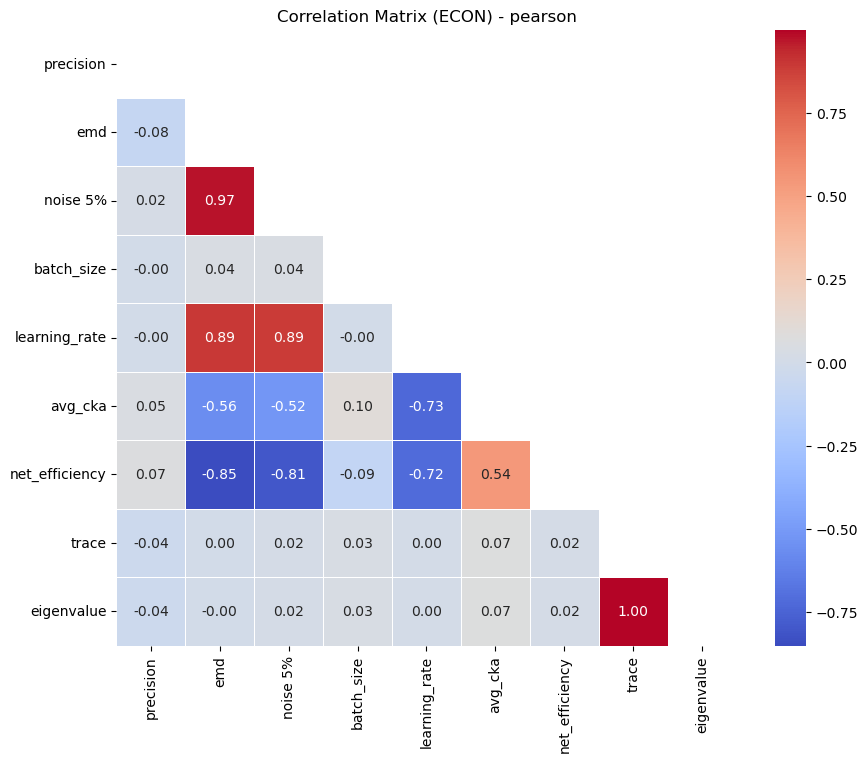

In [39]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (ECON) - pearson')
plt.show()

Check the logarithmic correlation:

In [24]:
correlation_matrix = dataset_df.corr(method='spearman')

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix (ECON) - spearman')
# plt.show()

In [25]:
correlation_matrix = dataset_df.corr(method='kendall')

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix (ECON) - kendall')
# plt.show()

## RN08

In [26]:
df_noise = pd.read_csv('./results/rn08/noise.csv')
# df_cka = pd.read_csv('./results/rn08/cka.csv')
df_fisher = pd.read_csv('./results/rn08/fisher.csv')
df_neural_efficiency = pd.read_csv('./results/rn08/neural_efficiency.csv')
df_hessian = pd.read_csv("./results/rn08/hessian.csv")

In [27]:
df_cka = df_cka[['precision', 'batch_size', 'learning_rate', 'avg_cka']]
df_fisher = df_fisher[['precision', 'batch_size', 'learning_rate', 'avg_EF']]
df_neural_efficiency = df_neural_efficiency[['precision', 'batch_size', 'learning_rate', 'net_efficiency']]
df_hessian = df_hessian[['precision', 'batch_size', 'learning_rate', 'trace', 'eigenvalue']]
dataset_df = pd.merge(df_noise, df_cka, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_fisher, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_neural_efficiency, on=['precision', 'batch_size', 'learning_rate'])
dataset_df = pd.merge(dataset_df, df_hessian, on=['precision', 'batch_size', 'learning_rate'])
dataset_df.head(1)

precision  accuracy  noise accuracy  batch_size  learning_rate  avg_cka  \
0          2      -1.0              -1          16            0.1      0.0   

                                              avg_EF  net_efficiency  trace  \
0  {'EF_trace_w': array([1.1159039e-13, 3.9345138...             NaN      0   

   eigenvalue  
0           0

In [28]:
dataset_df['trace'] = dataset_df['trace'].apply(lambda x: np.log10(x) if x > 0 else x)
# dataset_df['avg_EF'] = dataset_df['avg_EF'].apply(lambda x: np.log10(x) if x > 0 else x)
dataset_df['eigenvalue'] = dataset_df['eigenvalue'].apply(lambda x: np.log10(x) if x > 0 else x)

In [31]:
dataset_df.head(5)

precision  accuracy  noise accuracy  batch_size  learning_rate   avg_cka  \
0          2      -1.0              -1          16        0.10000  0.000000   
1          2      -1.0              -1          16        0.05000  0.384333   
2          2      -1.0              -1          16        0.02500  0.362396   
3          2      -1.0              -1          16        0.01250  0.421076   
4          2      -1.0              -1          16        0.00625  0.495452   

                                              avg_EF  net_efficiency  trace  \
0  {'EF_trace_w': array([1.1159039e-13, 3.9345138...             NaN      0   
1  {'EF_trace_w': array([0.00000e+00, 0.00000e+00...             NaN      0   
2  {'EF_trace_w': array([1526.831  ,  275.51514, ...             NaN      0   
3  {'EF_trace_w': array([1258.1575  ,  127.88638 ...             NaN      0   
4  {'EF_trace_w': array([ 818.0406  ,  230.42586 ...             NaN      0   

   eigenvalue  
0           0  
1           0  
2           0  
3           0  
4           0

In [29]:
dataset_df.to_csv('./results/rn08/dataset.csv', index=False)


In [ ]:
#sns.pairplot(dataset_df, corner=True)
#plt.show()

In [ ]:
correlation_matrix = dataset_df.corr()

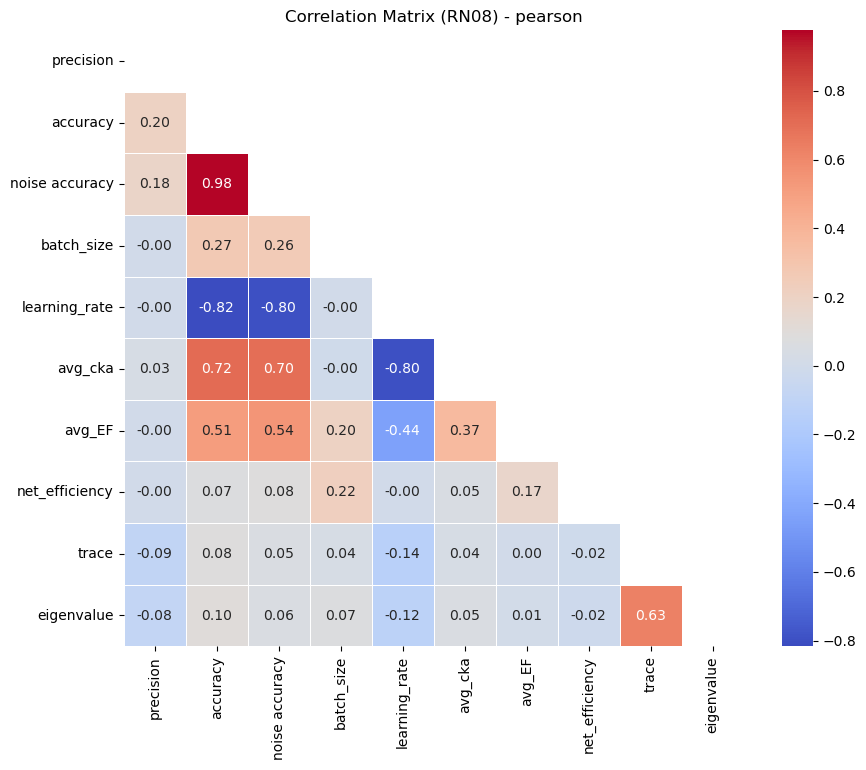

In [ ]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (RN08) - pearson')
plt.show()

# Effect of the quantization on the loss landscapes

In [ ]:
DATA_PATH = '/data/tbaldi/work/checkpoint/'

In [ ]:
def get_econ_loss_landscapes(batch_size, 
                        learning_rate, 
                        precision,
                        size, 
                        normalization,
                        steps, 
                        distance):
    '''
    Get the value of the Neural Efficiency
    '''
    # path to the directory
    path = os.path.join(
        DATA_PATH, 
        f'bs{batch_size}_lr{learning_rate}/ECON_{precision}b/{size}/',
        f'plot_{normalization}_{steps}_{distance}.pkl'
    )
    try:
        f = open(path, "rb")
        data = pickle.load(f)
        f.close()
    except:
        print(path + ' Not found!')
        return False
    
    return data[f'plot_{normalization}_{steps}_{distance}']
    
def get_rn08_loss_landscapes(batch_size, 
                             learning_rate, 
                             precision, 
                             normalization,
                             steps, 
                             distance):
    '''
    Get the value of the Neural Efficiency
    '''
    # path to the directory
    path = os.path.join(
        DATA_PATH, 
        f'bs{batch_size}_lr{learning_rate}/RN08_{precision}b/',
        f'plot_{normalization}_{steps}_{distance}.pkl'
    )
    try:
        f = open(path, "rb")
        data = pickle.load(f)
        f.close()
    except:
        print(path + ' Not found!')
        return False
    
    return data[f'plot_{normalization}_{steps}_{distance}']
    

## ECON

In [ ]:
BATCH_SIZE = 256
LEARNING_RATE = 0.0015625
NORMALIZATION = 'filter'
STEPS = 200
DISTANCE = 150
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

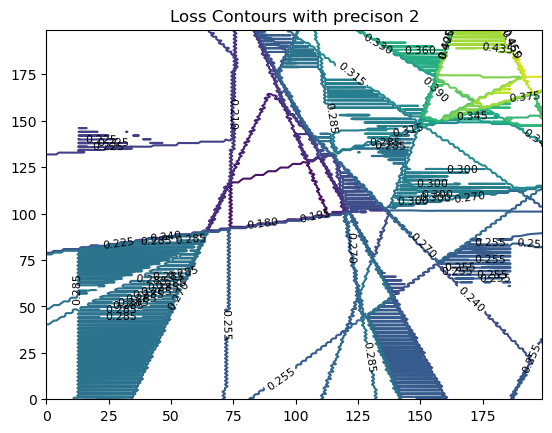

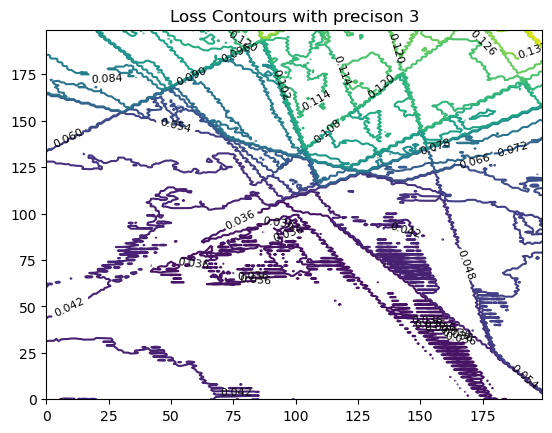

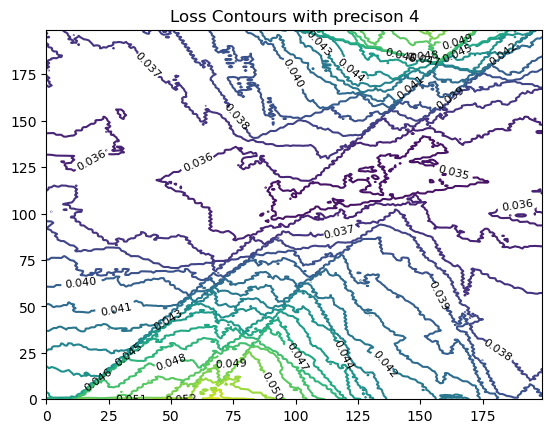

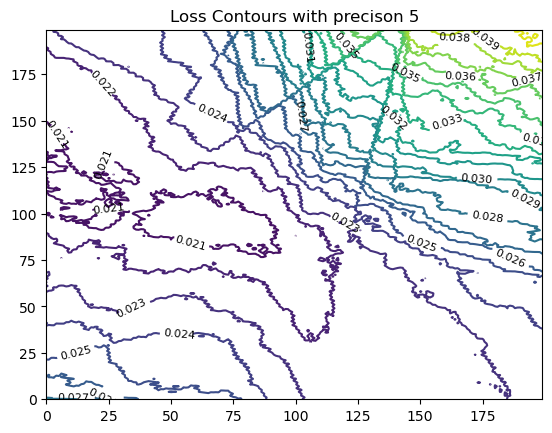

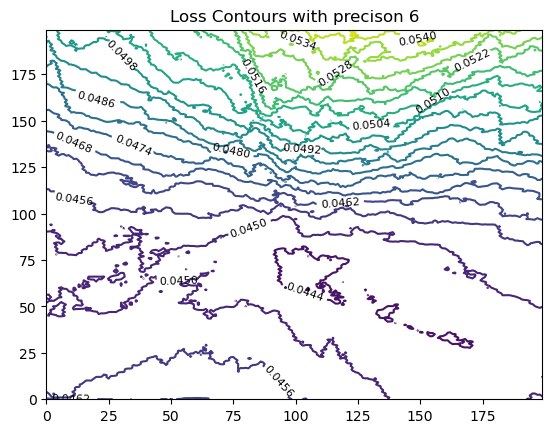

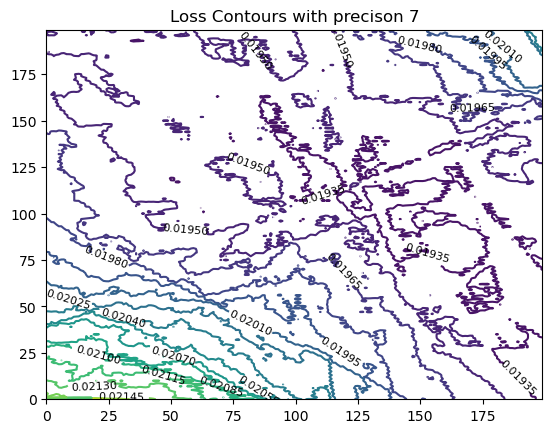

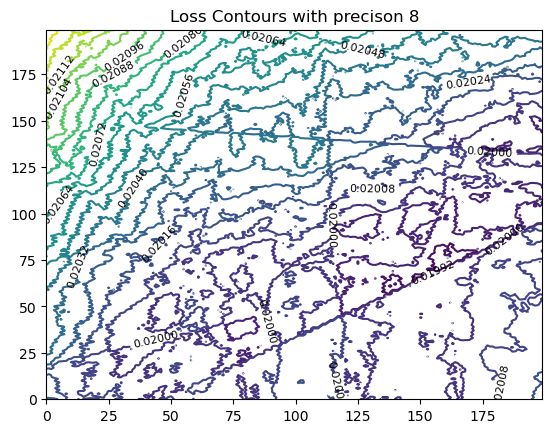

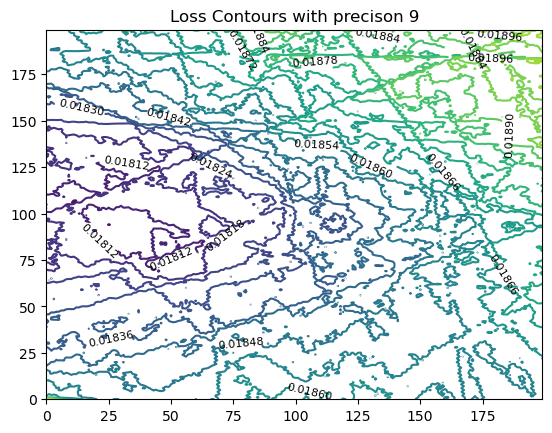

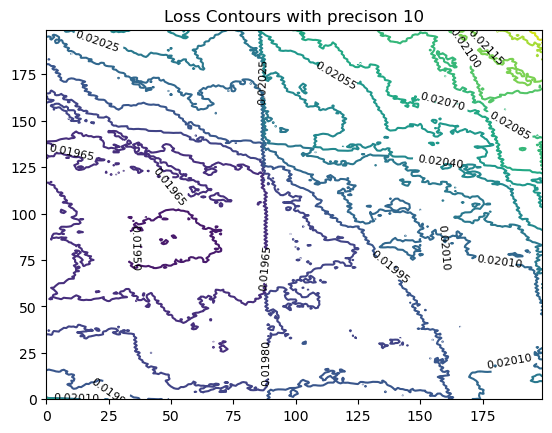

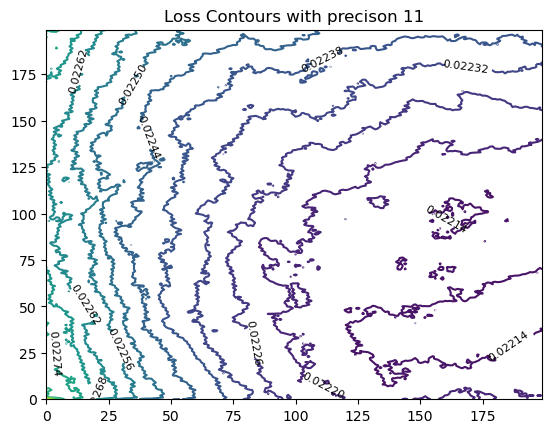

In [ ]:
for p in precisions:
    data = get_econ_loss_landscapes(BATCH_SIZE, LEARNING_RATE, p, 'baseline', NORMALIZATION, STEPS, DISTANCE)
    loss_data = data['points']
    # plot 2D
    plot = plt.contour(loss_data, levels=20)
    plt.clabel(plot, inline=True, fontsize=8, colors='black')
    plt.title(f'Loss Contours with precison {p}')
    plt.show()
    


/tmp/tbaldi/ipykernel_2614014/1289611872.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


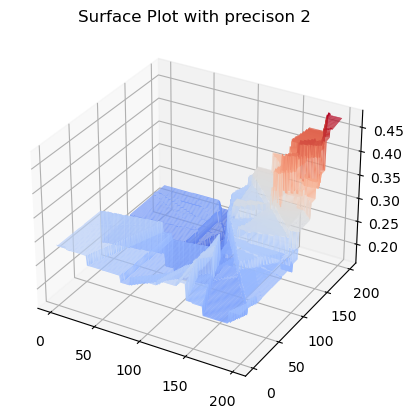

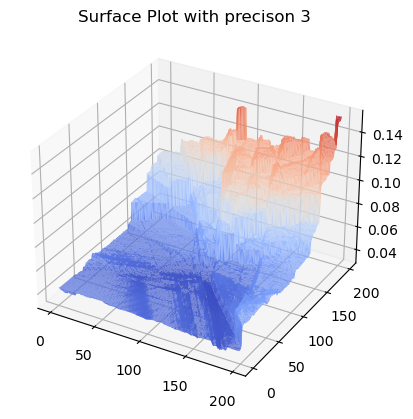

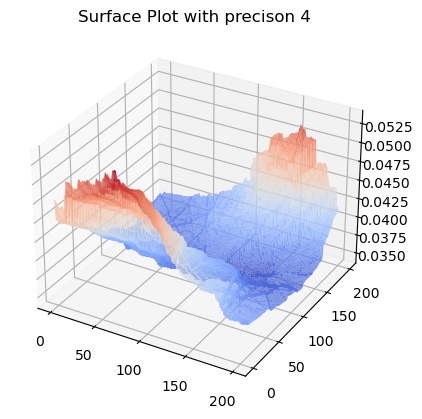

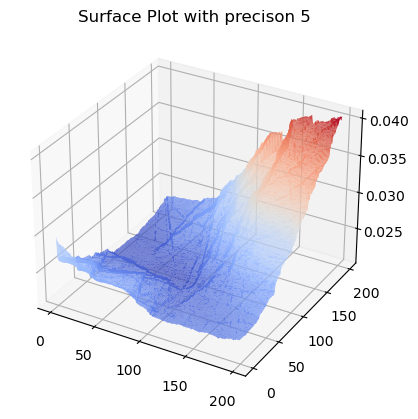

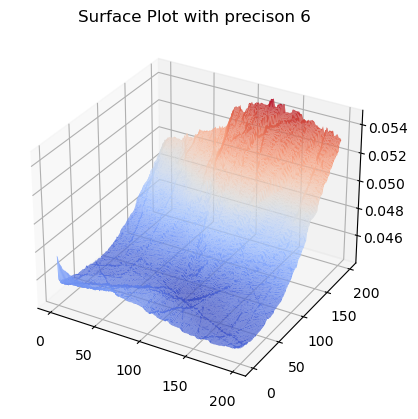

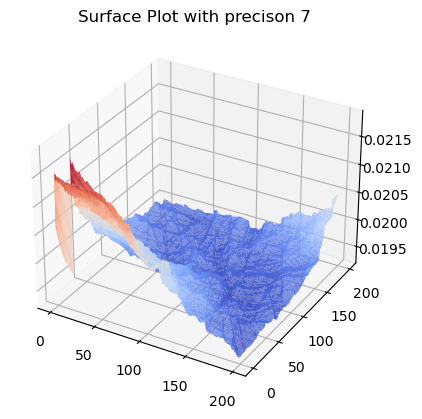

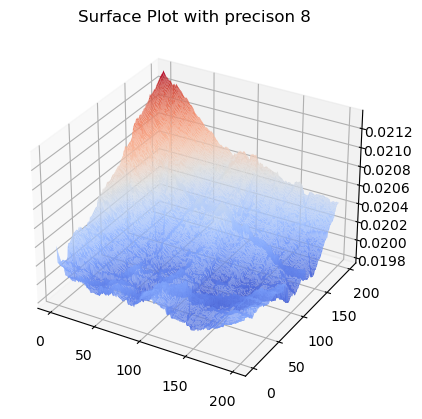

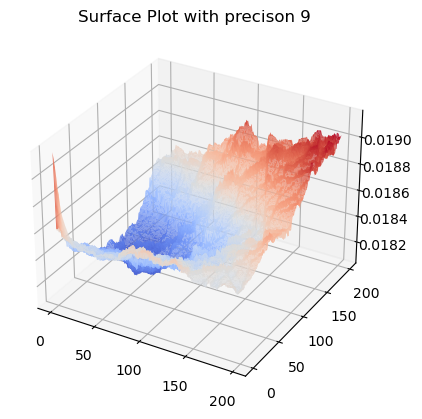

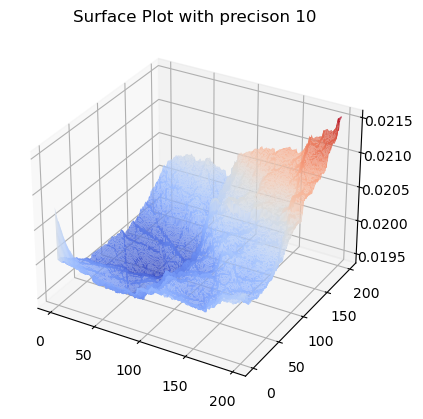

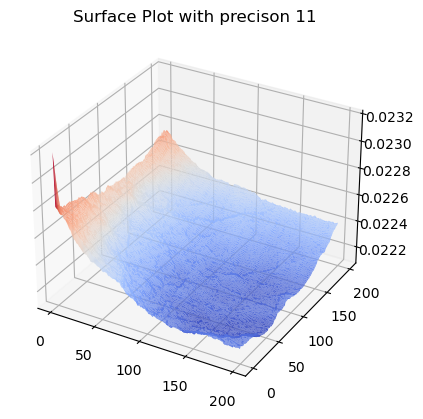

In [ ]:
for p in precisions:
    data = get_econ_loss_landscapes(BATCH_SIZE, LEARNING_RATE, p, 'baseline', NORMALIZATION, STEPS, DISTANCE)
    loss_data = data['points']    
    # #plot 3D
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    X = np.array([[j for j in range(STEPS)] for i in range(STEPS)])
    Y = np.array([[i for _ in range(STEPS)] for i in range(STEPS)])
    ax.plot_surface(X, Y, loss_data, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
    ax.set_title(f'Surface Plot with precison {p}')
    fig.show()

## RN08

In [ ]:
BATCH_SIZE = 1024
LEARNING_RATE = 0.0015625
NORMALIZATION = 'filter'
STEPS = 50
DISTANCE = 100
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

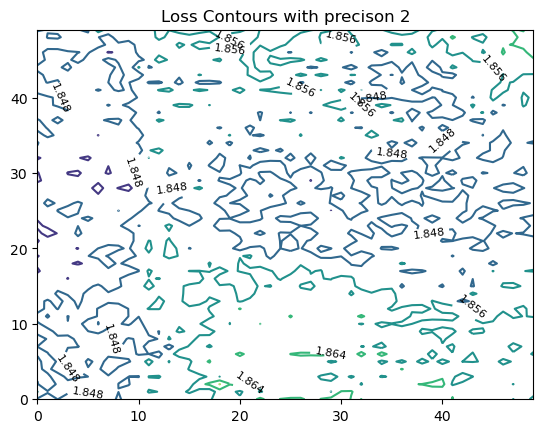

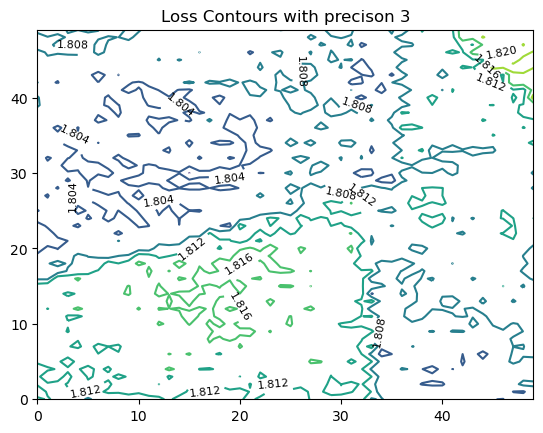

/data/tbaldi/work/checkpoint/bs1024_lr0.0015625/RN08_4b/plot_filter_50_100.pkl Not found!


TypeError: 'bool' object is not subscriptable

In [ ]:
for p in precisions:
    data = get_rn08_loss_landscapes(BATCH_SIZE, LEARNING_RATE, p, NORMALIZATION, STEPS, DISTANCE)
    loss_data = data['points']
    # plot 2D
    plot = plt.contour(loss_data, levels=5)
    plt.clabel(plot, inline=True, fontsize=8, colors='black')
    plt.title(f'Loss Contours with precison {p}')
    plt.show()
    

/data/tbaldi/work/checkpoint/bs1024_lr0.0015625/RN08_4b/plot_filter_50_100.pkl Not found!


/tmp/tbaldi/ipykernel_928336/842761857.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


TypeError: 'bool' object is not subscriptable

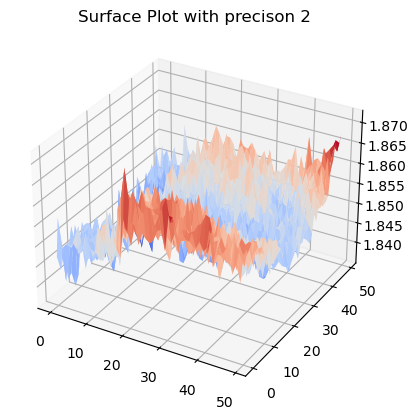

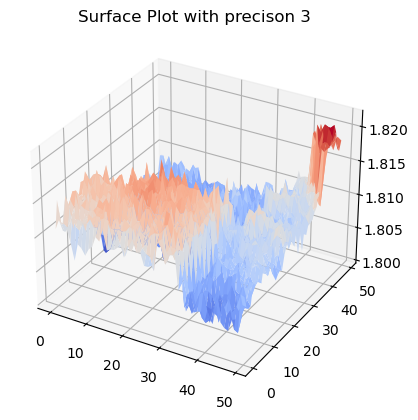

In [ ]:
for p in precisions:
    data = get_rn08_loss_landscapes(BATCH_SIZE, LEARNING_RATE, p, NORMALIZATION, STEPS, DISTANCE)
    loss_data = data['points']    
    # #plot 3D
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    X = np.array([[j for j in range(STEPS)] for i in range(STEPS)])
    Y = np.array([[i for _ in range(STEPS)] for i in range(STEPS)])
    ax.plot_surface(X, Y, loss_data, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
    ax.set_title(f'Surface Plot with precison {p}')
    fig.show()

# Features of the non-dominated solutions
We can see our task as Multi-Objective problems, indeed we have 3 objective function:

- we prefer models with higher accuracy;
- we prefer models with lower precision;
- we prefer models with higher robustness.

The idea is to evidence the non-dominated solutions of our analysis to check what are the characteristics of those kinds of models.

In [75]:
df = dataset_df[['precision', 'emd', 'noise 5%']].copy()

### Efficiebt set of our grid search

In [76]:
front = 0
while not df.empty:
    front += 1
    # compute non dominated solutions
    best_mask = paretoset(df, sense=['min', 'min', 'min'])
    ES_df = df[best_mask].copy()
    # update dataset
    dataset_df.loc[ES_df.index, "front"] = front
    # remove front from the population
    df = df.drop(ES_df.index)
    
FRONTS = 3

In [77]:
dataset_df[dataset_df['front'] <= FRONTS]

precision       emd  noise 5%  noise 10%  noise 15%  noise 20%  \
6            2  2.768796  2.607853   2.948684   3.290247   3.584121   
12           2  2.891344  2.885671   3.098429   3.340414   3.549937   
27           2  2.715291  2.543496   2.863617   3.183720   3.445405   
33           2  3.140657  2.861820   3.084846   3.376455   3.647185   
62           3  1.428586  1.714786   2.270176   2.754300   3.136089   
69           3  1.534006  1.757288   2.340167   2.845765   3.247920   
76           3  1.513520  1.801694   2.315465   2.774440   3.130586   
89           3  1.511559  1.798054   2.319324   2.762707   3.112259   
104          4  1.230677  1.675178   2.343803   2.838584   3.200978   
111          4  1.262199  1.688466   2.307697   2.781537   3.130150   
117          4  1.243314  1.660596   2.310483   2.772190   3.089334   
118          4  1.255315  1.680094   2.289954   2.749573   3.079991   
138          4  1.362316  1.664249   2.238219   2.714753   3.080361   
152          5  1.219857  1.699693   2.390615   2.932057   3.330758   
153          5  1.155972  1.649740   2.316256   2.786517   3.113371   
160          5  1.151243  1.792468   2.588295   3.104950   3.419019   
166          5  1.226382  1.799220   2.557205   3.070867   3.396305   
167          5  1.203289  1.870249   2.650724   3.115287   3.366210   
174          5  1.257047  1.753840   2.439508   2.902977   3.196648   
201          6  1.219430  1.781016   2.540808   3.117682   3.510236   
202          6  1.185079  1.896913   2.697220   3.233220   3.568698   
208          6  1.171651  2.150863   3.029433   3.451279   3.651480   
209          6  1.162778  2.276698   2.984925   3.330741   3.509179   
215          6  1.170429  2.063368   2.946672   3.382367   3.587174   
223          6  1.105781  2.092937   3.006155   3.534956   3.847934   
228          6  1.147033  2.082024   2.807577   3.183726   3.393645   
229          6  1.174051  2.058215   2.837665   3.229052   3.433415   
250          7  1.194396  2.140102   3.077125   3.616726   3.886203   
265          7  1.132471  2.158104   3.113376   3.681315   4.003596   
300          8  1.134877  2.377806   3.076782   3.423718   3.610821   
307          8  1.127017  2.892940   3.398102   3.557063   3.627581   
314          8  1.127975  2.684867   3.474687   3.793486   3.931022   
356          9  1.114145  2.930733   3.458393   3.635916   3.713881   
404         10  1.104643  3.295514   3.608166   3.627738   3.625013   
412         10  1.126236  2.939933   3.599533   3.833584   3.948925   
447         11  1.120972  3.225034   3.688270   3.804184   3.845747   

     batch_size  learning_rate   avg_cka    avg_EF  net_efficiency  \
6            16       0.001563  0.506034  0.003373        0.205131   
12           32       0.003125  0.663080  0.000266        0.166002   
27          128       0.001563  0.533331  0.017704        0.289450   
33          256       0.003125  0.486119  0.119289        0.284782   
62           32       0.001563  0.879041  0.000061        0.585544   
69           64       0.001563  0.747279  0.000069        0.722646   
76          128       0.001563  0.808334  0.000461        0.536115   
89          512       0.003125  0.795351  0.000481        0.619357   
104          16       0.001563  0.950946  0.008420        0.482084   
111          32       0.001563  0.884397  0.000695        0.497498   
117          64       0.003125  0.936417  0.001332        0.566857   
118          64       0.001563  0.885488  0.003095        0.569340   
138         512       0.003125  0.850413  0.012816        0.511907   
152          16       0.003125  0.849257  0.082321        0.614144   
153          16       0.001563  0.902411  0.147052        0.475019   
160          32       0.001563  0.932709  0.290931        0.484760   
166          64       0.003125  0.883973  0.187828        0.500502   
167          64       0.001563  0.845756  0.111582        0.520515   
174         128       0.001563  0.701276  0.552

### 2D plots

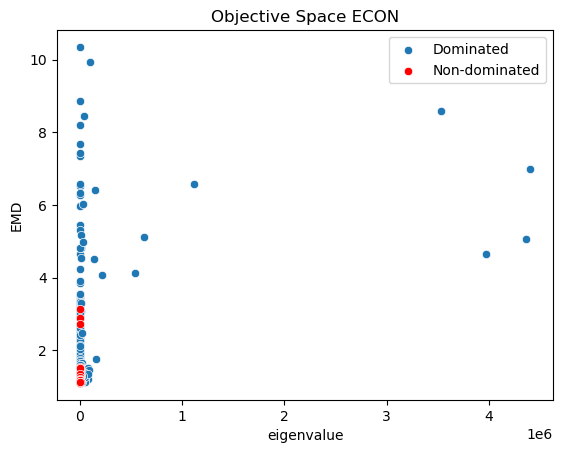

In [80]:
dataset_df = dataset_df[dataset_df['eigenvalue'] > 0]
sns.scatterplot(x='eigenvalue', y='emd', data=dataset_df, label='Dominated')
sns.scatterplot(x='eigenvalue', y='emd', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.xlabel('eigenvalue')
plt.ylabel('EMD')
plt.title(f'Objective Space ECON')

# Display the plot
plt.legend()
plt.show()

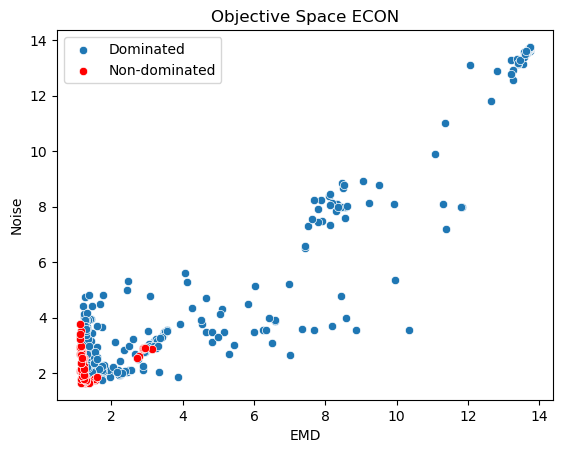

In [ ]:
sns.scatterplot(x='emd', y='noise 5%', data=dataset_df, label='Dominated')
sns.scatterplot(x='emd', y='noise 5%', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.xlabel('EMD')
plt.ylabel('Noise')
plt.title(f'Objective Space ECON')

# Display the plot
plt.legend()
plt.show()

Let's try to plot them comparing the lerning rate with the neural efficiency due to their correlation.

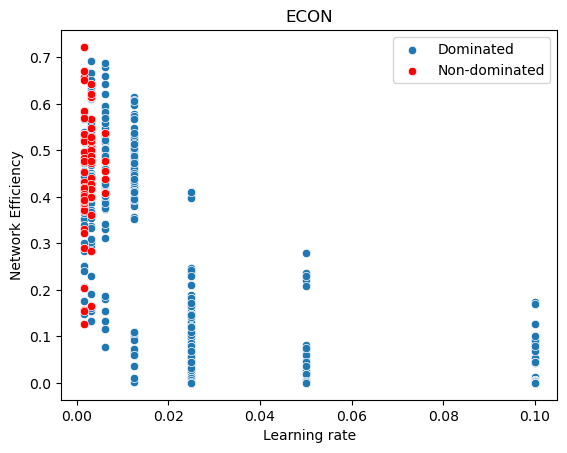

In [ ]:
sns.scatterplot(y='net_efficiency', x='learning_rate', data=dataset_df, label='Dominated')
sns.scatterplot(y='net_efficiency', x='learning_rate', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Network Efficiency')
plt.xlabel('Learning rate')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

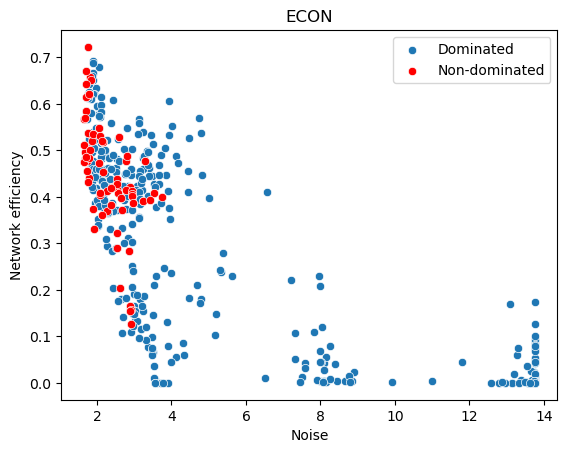

In [ ]:
sns.scatterplot(x='noise 5%', y='net_efficiency', data=dataset_df, label='Dominated')
sns.scatterplot(x='noise 5%', y='net_efficiency', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.xlabel('Noise')
plt.ylabel('Network efficiency')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

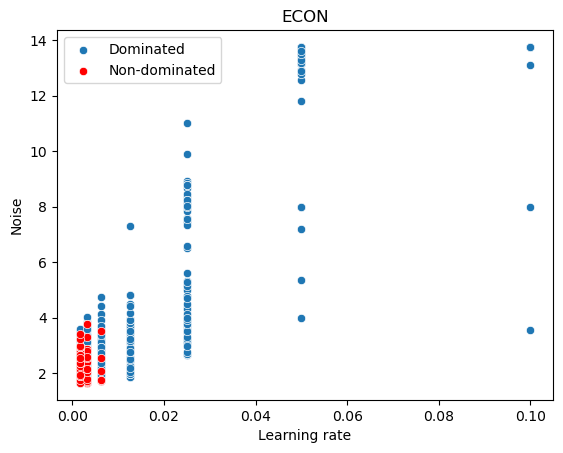

In [ ]:
sns.scatterplot(y='noise 5%', x='learning_rate', data=dataset_df, label='Dominated')
sns.scatterplot(y='noise 5%', x='learning_rate', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Noise')
plt.xlabel('Learning rate')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

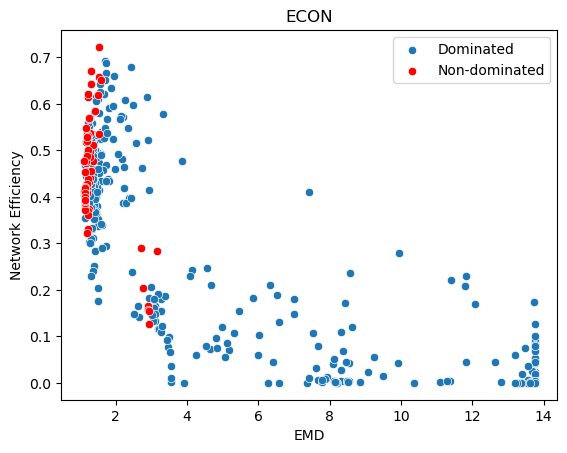

In [ ]:
sns.scatterplot(y='net_efficiency', x='emd', data=dataset_df, label='Dominated')
sns.scatterplot(y='net_efficiency', x='emd', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Network Efficiency')
plt.xlabel('EMD')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

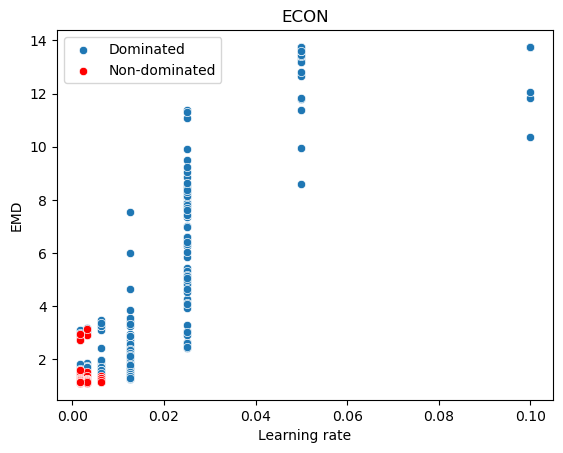

In [ ]:
sns.scatterplot(x='learning_rate', y='emd', data=dataset_df, label='Dominated')
sns.scatterplot(x='learning_rate', y='emd', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.xlabel('Learning rate')
plt.ylabel('EMD')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

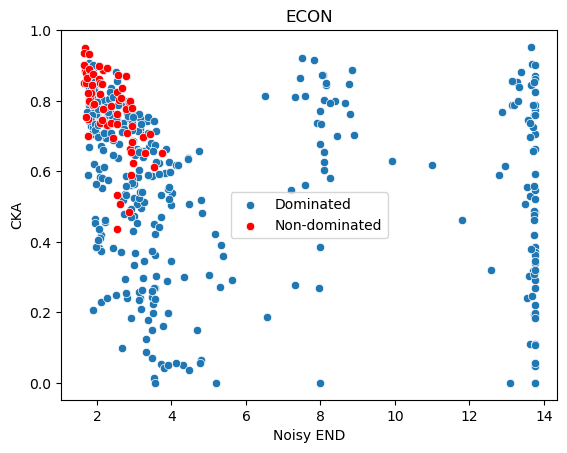

In [ ]:
sns.scatterplot(y='avg_cka', x='noise 5%', data=dataset_df, label='Dominated')
sns.scatterplot(y='avg_cka', x='noise 5%', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('CKA')
plt.xlabel('Noisy END')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

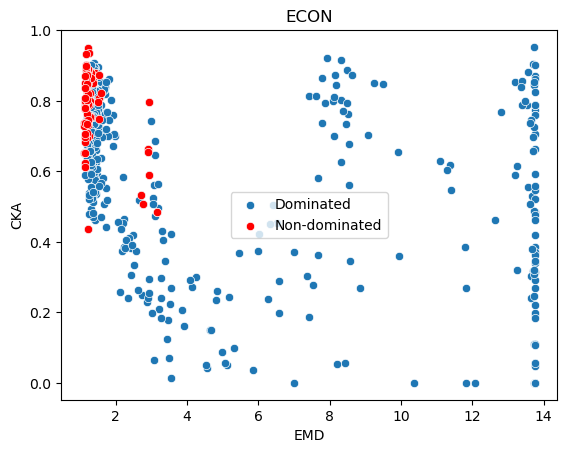

In [ ]:
sns.scatterplot(y='avg_cka', x='emd', data=dataset_df, label='Dominated')
sns.scatterplot(y='avg_cka', x='emd', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('CKA')
plt.xlabel('EMD')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

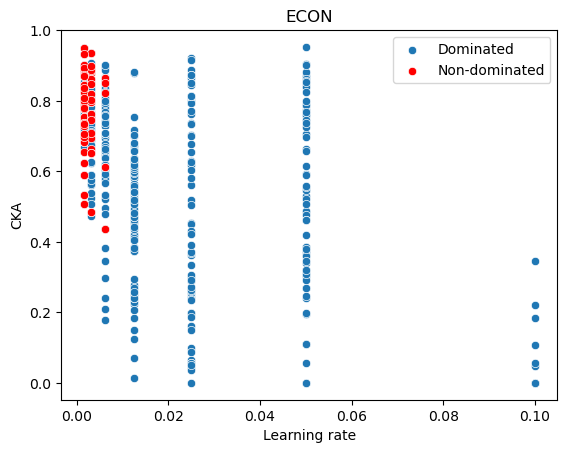

In [ ]:
sns.scatterplot(y='avg_cka', x='learning_rate', data=dataset_df, label='Dominated')
sns.scatterplot(y='avg_cka', x='learning_rate', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('CKA')
plt.xlabel('Learning rate')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

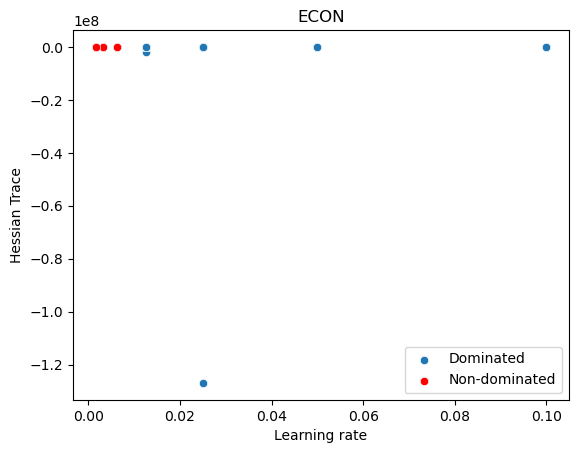

In [ ]:
sns.scatterplot(y='trace', x='learning_rate', data=dataset_df, label='Dominated')
sns.scatterplot(y='trace', x='learning_rate', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Hessian Trace')
plt.xlabel('Learning rate')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

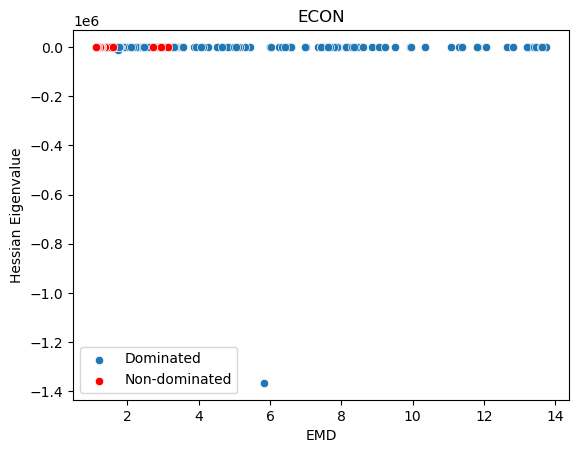

In [ ]:
sns.scatterplot(y='eigenvalue', x='emd', data=dataset_df, label='Dominated')
sns.scatterplot(y='eigenvalue', x='emd', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Hessian Eigenvalue')
plt.xlabel('EMD')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

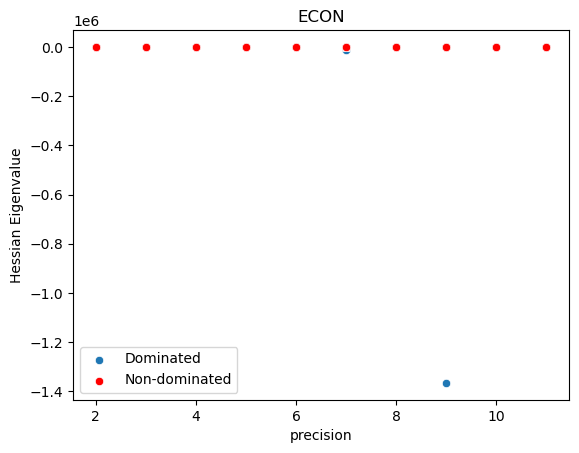

In [ ]:
sns.scatterplot(y='eigenvalue', x='precision', data=dataset_df, label='Dominated')
sns.scatterplot(y='eigenvalue', x='precision', data=dataset_df[dataset_df['front'] <= FRONTS], color='red', label='Non-dominated')

plt.ylabel('Hessian Eigenvalue')
plt.xlabel('precision')
plt.title(f'ECON')

# Display the plot
plt.legend()
plt.show()

### 3D plots

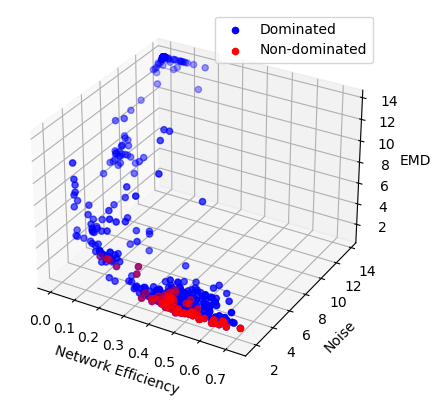

In [ ]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all points
ax.scatter(dataset_df['net_efficiency'], dataset_df['noise 5%'], dataset_df['emd'], c='blue', label='Dominated')

# Highlight points based on index
highlight_indices = dataset_df[dataset_df['front'] <= FRONTS].index
highlight_df = dataset_df.iloc[highlight_indices]
ax.scatter(highlight_df['net_efficiency'], highlight_df['noise 5%'], highlight_df['emd'], c='red', label='Non-dominated')

# Set labels
ax.set_xlabel('Network Efficiency')
ax.set_zlabel('EMD')
ax.set_ylabel('Noise')

# Add legend
plt.legend()

# Show plot
plt.show()

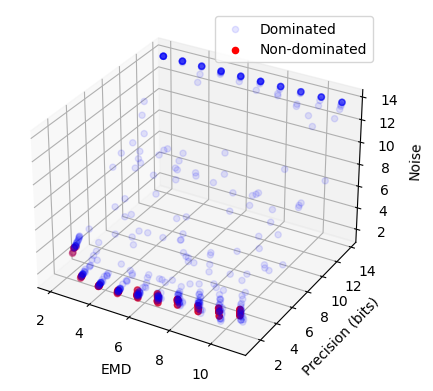

In [ ]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all points
ax.scatter(dataset_df['precision'], dataset_df['emd'], dataset_df['noise 5%'], c='blue', alpha=0.1, label='Dominated')

# Highlight points based on index
highlight_indices = dataset_df[dataset_df['front'] <= FRONTS].index
highlight_df = dataset_df.iloc[highlight_indices]
ax.scatter(highlight_df['precision'], highlight_df['emd'], highlight_df['noise 5%'], c='red', label='Non-dominated')

# Set labels
ax.set_xlabel('EMD')
ax.set_ylabel('Precision (bits)')
ax.set_zlabel('Noise')

# Add legend
plt.legend()

# Show plot
plt.show()

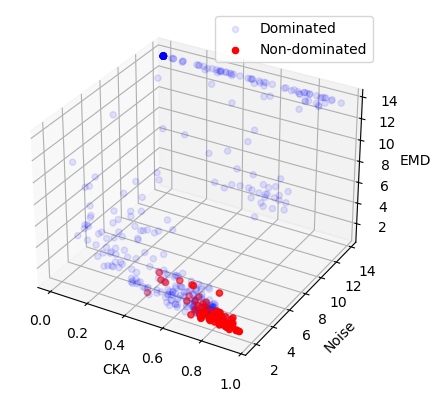

In [ ]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all points
ax.scatter(dataset_df['avg_cka'], dataset_df['noise 5%'], dataset_df['emd'], c='blue', alpha=0.1, label='Dominated')

# Highlight points based on index
highlight_indices = dataset_df[dataset_df['front'] <= FRONTS].index
highlight_df = dataset_df.iloc[highlight_indices]
ax.scatter(highlight_df['avg_cka'], highlight_df['noise 5%'], highlight_df['emd'], c='red', label='Non-dominated')

# Set labels
ax.set_xlabel('CKA')
ax.set_zlabel('EMD')
ax.set_ylabel('Noise')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
dataset_df[dataset_df['front'] == 1]

precision       emd  noise 5%  batch_size  learning_rate   avg_cka  \
27           2  2.715291  2.543496         128       0.001563  0.533331   
62           3  1.428586  1.714786          32       0.001563  0.879041   
104          4  1.230677  1.675178          16       0.001563  0.950946   
117          4  1.243314  1.660596          64       0.003125  0.936417   
153          5  1.155972  1.649740          16       0.001563  0.902411   
160          5  1.151243  1.792468          32       0.001563  0.932709   
223          6  1.105781  2.092937         128       0.001563  0.738465   
228          6  1.147033  2.082024         256       0.006250  0.850636   
404         10  1.104643  3.295514          32       0.003125  0.652677   

     net_efficiency     trace  eigenvalue  front  
27         0.289450  4.131345    1.476649    1.0  
62         0.585544  4.477005    2.131615    1.0  
104        0.482084  4.693621    1.754795    1.0  
117        0.566857  4.638691    1.766435    1.0  
153        0.475019  4.469020    1.964603    1.0  
160        0.484760  5.184758    2.811941    1.0  
223        0.403178  5.536678    3.325435    1.0  
228        0.407676  5.304844    3.168468    1.0  
404        0.476849  6.575057    3.923268    1.0